Anexo M

# Reconocedor a partir de preprocesamiento de datos clínicos con auxilio de PCA

#### Elaborado por: Ricardo Niño de Rivera **Barrón**

#### Ingeniería Biónica

#### Trabajo Terminal II


En esta libreta interactiva se describe el proceso para la construcción de un reconocedor artificial a aprtir de datos clínicicos utilizando una tranformación previa de los datos utilizando Análisis de Componentes Principales PCA.

Esta libreta se desarrolló en la plaforma Google Colab con el objetiivo de mejorar la velocidad de implementación.

In [1]:
# Importando bibliotecas necesarias
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.image as mpimg
import sklearn


Instalando biblioteca para leer archivos de Google Drive

In [2]:
# No es necesario a partir de última actualización de Google Colab
#!pip install PyDrive

In [3]:
# Importamos los métodos necesarios de la biblioteca instalada
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
# Autenticamos el acceso a la cuenta Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Ahora instalamos una nueva biblioteca para poder descargar archivos de MEGA.

In [5]:
# Instalanado mega.py
!pip install mega.py

     |████████████████████████████████| 13.7MB 241kB/s 


In [6]:
# De la biblioteca mega importamos el método Mega
from mega import Mega

In [7]:
# Instanciando Mega en el objeto mega
mega = Mega()

Ahora necesitamos obtener un nuevo archivo de Google Drive con la información de acceso a la cuenta de MEGA donde tenemos los archivos de interés.

In [8]:
# Accedemos al archivo con los datos de acceso a la cuenta en MEGA
downloaded = drive.CreateFile({'id':"1qY56J5ziiRklMPOIfS16vJrLsjZ7Vqso"})   # instanciamos con el ID del documento al que se desea acceder en Google Drive
downloaded.GetContentFile('cuentaMEGA.csv')        # descargamos el archivo en el entorno virtual de Google Colab

In [9]:
# Leyendo el archivo con los datos de acceso
cuenta=pd.read_csv('cuentaMEGA.csv')

Inicamos sesión en la cuenta de MEGA

In [10]:
email = cuenta.EMAIL.iloc[0]
password = cuenta.PASSWORD.iloc[0]

# Log in en la cuenta de MEGA con los datos de acceso
m = mega.login(email, password)

Descargamos los archivos que se construyeron en el Anexo L




In [11]:
# Descargando X_train2.npy
m.download_url('https://mega.nz/file/wYQ3yaCD#pz3ekEi07oOo9FIn0_LNEiTUGQ56ciaI-8_0t0agcUQ')

PosixPath('X_train2.npy')

In [12]:
# Descargando X_test2.npy
m.download_url('https://mega.nz/file/0NRzgAAZ#FWcoEA3IR8RoKine3qZrcD0r4kG_QpFpAQek3KLwA6o')

PosixPath('X_test2.npy')

In [13]:
# Descargando Y_train2.npy
m.download_url('https://mega.nz/file/MZgUWJBb#IZPpigzJC9c7qXe_ApbuXKNeV8X7QJd_XAIv_4-zzTY')

PosixPath('Y_train2.npy')

In [14]:
# Descargando Y_test2.npy
m.download_url('https://mega.nz/file/VdhGxbqA#qRBEPPqST3sAw6AK5DTSs93fz4zF8fmLV0QBHsENDsw')

PosixPath('Y_test2.npy')

Ahora se leen los archivos con numpy

In [15]:
X_train = np.load('X_train2.npy')
X_train.shape

(169, 11)

In [16]:
X_test = np.load('X_test2.npy')
X_test.shape

(43, 11)

In [17]:
Y_train = np.load('Y_train2.npy')
Y_train.shape

(169,)

In [18]:
Y_test = np.load('Y_test2.npy')
Y_test.shape

(43,)

### Análisis de Componentes Principales PCA

PCA es una técnica que reduce las dimensiones de un arreglo matricial utilizando las propiedades lineales de sus columnas.

In [19]:
sklearn.__version__

'0.22.2.post1'

In [20]:
# Importando el método PCA
from sklearn.decomposition import PCA

In [21]:
# Instanciando PCa en un objeto que transforme los datos a 3 dimensiones
pca = PCA(n_components=3)

In [22]:
# Para X_train
X_train_pca = pca.fit(X_train).transform(X_train)

In [23]:
# Para X_test
# Nótese que se utiliza X_train para ajustar el pca
X_test_pca = pca.fit(X_train).transform(X_test)

In [24]:
# Comprobación con un ejemplo cualesquiera

#Leyendo ejemplo
ejemplo_test = X_test[5,:]

#Expandiendo una dimension
ejemplo_test = np.expand_dims(ejemplo_test,axis=0)

#Transformando el ejemplo
prueba1 = pca.fit(X_train).transform(ejemplo_test)
print(prueba1)
print(X_test_pca[5,:])

[[-3.00499965 -0.04400478 -0.36502007]]
[-3.00499965 -0.04400478 -0.36502007]


La implementación es correcta.

Graficando X_train_pca

In [25]:
pos_train = np.where(Y_train==1)

In [26]:
neg_train = np.where(Y_train==0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()


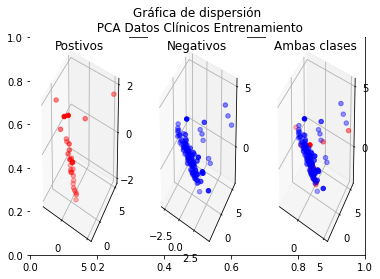

In [27]:
fig = plt.figure()
plt.title('Gráfica de dispersión\n PCA Datos Clínicos Entrenamiento')
ax = fig.add_subplot(1,3,1, projection='3d', title='Postivos')
ax.scatter(X_train_pca[pos_train,0], X_train_pca[pos_train,1], X_train_pca[pos_train,2], color='red')
ax = fig.add_subplot(1,3,2, projection='3d', title='Negativos')
ax.scatter(X_train_pca[neg_train,0], X_train_pca[neg_train,1], X_train_pca[neg_train,2], color='blue')
ax = fig.add_subplot(1,3,3, projection='3d', title='Ambas clases')
ax.scatter(X_train_pca[pos_train,0], X_train_pca[pos_train,1], X_train_pca[pos_train,2], color='red')
ax.scatter(X_train_pca[neg_train,0], X_train_pca[neg_train,1], X_train_pca[neg_train,2], color='blue')#
#plt.axis('off')
plt.axis(axis='off')
plt.savefig('PCA_train_clinic_data.png')

Graficando X_test_pca

In [28]:
pos_test = np.where(Y_test==1)
neg_test = np.where(Y_test==0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()


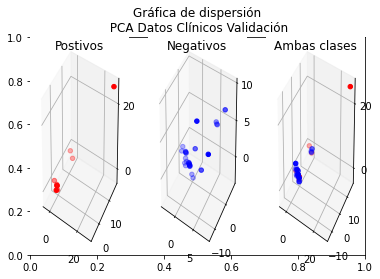

In [133]:
fig = plt.figure()
plt.title('Gráfica de dispersión\n PCA Datos Clínicos Validación')
ax = fig.add_subplot(1,3,1, projection='3d', title='Postivos')
ax.scatter(X_test_pca[pos_test,0], X_test_pca[pos_test,1], X_test_pca[pos_test,2], color='red')
ax = fig.add_subplot(1,3,2, projection='3d', title='Negativos')
ax.scatter(X_test_pca[neg_test,0], X_test_pca[neg_test,1], X_test_pca[neg_test,2], color='blue')
ax = fig.add_subplot(1,3,3, projection='3d', title='Ambas clases')
ax.scatter(X_test_pca[pos_test,0], X_test_pca[pos_test,1], X_test_pca[pos_test,2], color='red')
ax.scatter(X_test_pca[neg_test,0], X_test_pca[neg_test,1], X_test_pca[neg_test,2], color='blue')#
#plt.axis('off')
plt.axis(axis='off')
plt.savefig('PCA_test_clinic_data.png')

### Red Neuronal Artificial

Se propone una red neuronal artificial con tres capas ocultas.

In [30]:
# importando bibliotecas auxiliares
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.layers import Dense, Dropout
import tensorflow_addons as tfa
from tensorflow.keras import Model, Input

In [31]:
# Importando métricas de scikit learn}
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, accuracy_score

In [32]:
# Arreglando el problema de clases desbalanceadas estableciendo un peso por clase en el función de costo
w_p=np.sum(Y_train==0)/Y_train.shape[0]
w_n=np.sum(Y_train==1)/Y_train.shape[0]

In [33]:
# Creando diccionario para establecer el peso de cada clase de salida
class_weights = { 0 : w_n , 1 : w_p }

In [34]:
# definimos dropout
# Esta factor que está definido entre 0 y 1
# es un factor que determina la tasa de unidades que se "apagarán"
# durante el entrenamiento; esto evita el sobreajuste
dropout = 0.2

In [35]:
# Definimos un modelo de incialización
# Esta inicialización ha demostrado ser bastante útil
# para ayudar al modelo a converger más rápido.
# Incialización por he es una técnica que utiliza la destribución probabílistica
# propuesta por He para incializar los pesos de la red neuronal
# Para más información refierase a la coumentación
# de la biblioteca
kernel_init = 'he_normal'

In [36]:
# Creando el modelo de la red neuronal de tres capasocultas con 10,000 unidades por capa
rnet = tf.keras.Sequential()
rnet.add(Dense(300, activation="relu", kernel_initializer=kernel_init, input_shape=(X_train_pca.shape[1],)))
rnet.add(Dropout(dropout))
rnet.add(Dense(300, activation="relu", kernel_initializer=kernel_init))
rnet.add(Dropout(dropout))
rnet.add(Dense(300, activation="relu", kernel_initializer=kernel_init))
rnet.add(Dropout(dropout))
rnet.add(Dense(1, activation='sigmoid', kernel_initializer=kernel_init))

In [37]:
# Visualizando el modelo
rnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [38]:
rnet.input.shape

TensorShape([None, 3])

In [39]:
# Añadiendo un término de regularización para evitar sobreajuste

L1 = 0.1

regularizer = tf.keras.regularizers.L1(l1=L1)

rnet.trainable = True

for layer in rnet.layers:
    for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)

In [40]:
# Se fuerza a la tasa de aprendiza a decaer de forma polinomial para evitar problemas con el entrenamiento
starter_learning_rate = 0.1
end_learning_rate = 0.01
decay_steps = 5
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    starter_learning_rate,
    decay_steps,
    end_learning_rate,
    power=0.5)

In [41]:
# Definimos el optimizador utilizando el método de Adam
# Este método es una modificación del algoritmo de
# gradiente descendiente
#opt=tf.keras.optimizers.Adam(learning_rate=0.001 ,clipvalue=5)
opt=tf.keras.optimizers.Adam(learning_rate=learning_rate_fn) #,clipvalue=5)

In [115]:
# Definiendo las métricas necesarias para dar seguimiento al modelo
METRICS = [
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
  tfa.metrics.F1Score(num_classes=2, average="micro", threshold=0.5),
  tf.keras.metrics.AUC(name='AUC')
]

In [116]:
# Compilando el modelo
rnet.compile(
    optimizer=opt,
    loss = 'binary_crossentropy',
    metrics=METRICS
)

Se guardará el modelo con el mejor rendimiento de AUC ya que se observó en distintos experimentos que se puede alcanzar un modelo que dé resultados mejores al azar.

In [117]:
# Con este objeto se guardará el mejor modelo con base a la métrica f1_score
sv = tf.keras.callbacks.ModelCheckpoint(filepath='rnet_clinic_data.h5',monitor='val_AUC', verbose=0, save_best_only=True,
        save_weights_only=False, mode='max', save_freq='epoch')

In [118]:
# Tamaño del batch
# Debido a que es un conjunto de datos relativamente pequeño se utilizará todos los ejemplos como batch
BS = X_train_pca.shape[0]

In [119]:
# Entrenando el modelo y almacenando los valores en history_1
history_1 = rnet.fit(X_train_pca, Y_train, batch_size=BS,
                          steps_per_epoch=len(X_train_pca) // BS, validation_data=(X_test_pca, Y_test),
                          epochs=500, verbose=2, class_weight=class_weights, callbacks=[sv])

Epoch 1/500
1/1 - 0s - loss: 1.0251 - accuracy: 0.6095 - precision: 0.2716 - recall: 0.7586 - f1_score: 0.4000 - AUC: 0.6697 - val_loss: 4.1864 - val_accuracy: 0.6512 - val_precision: 0.3333 - val_recall: 0.3636 - val_f1_score: 0.3478 - val_AUC: 0.6193
Epoch 2/500
1/1 - 0s - loss: 1.1266 - accuracy: 0.6686 - precision: 0.2245 - recall: 0.3793 - f1_score: 0.2821 - AUC: 0.6284 - val_loss: 6.4001 - val_accuracy: 0.6977 - val_precision: 0.2500 - val_recall: 0.0909 - val_f1_score: 0.1333 - val_AUC: 0.6151
Epoch 3/500
1/1 - 0s - loss: 0.7817 - accuracy: 0.6805 - precision: 0.2093 - recall: 0.3103 - f1_score: 0.2500 - AUC: 0.6068 - val_loss: 5.6673 - val_accuracy: 0.4884 - val_precision: 0.2609 - val_recall: 0.5455 - val_f1_score: 0.3529 - val_AUC: 0.4588
Epoch 4/500
1/1 - 0s - loss: 1.3494 - accuracy: 0.5740 - precision: 0.1692 - recall: 0.3793 - f1_score: 0.2340 - AUC: 0.5365 - val_loss: 5.1862 - val_accuracy: 0.3721 - val_precision: 0.2500 - val_recall: 0.7273 - val_f1_score: 0.3721 - val_

In [120]:
# Primera iteración con el AUC de validación más alto
best_iter=np.where(np.max(history_1.history['val_AUC'])==history_1.history['val_AUC'])[0][0]
print(best_iter)

63


In [121]:
# AUC más alto
history_1.history['val_AUC'][best_iter]

0.6988636255264282

In [122]:
# Definiendo la función para desplegar la curva ROC
def plot_roc(name, labels, predictions, name_fig):
    fp, tp, _ = roc_curve(labels, predictions)
    auc1 = auc(fp, tp)
    lw=2

    plt.plot(100*fp, 100*tp, linewidth=2, lw=lw, color='darkorange', label='ROC curve (area = %0.2f)' % auc1)
    plt.plot([0, 100], [0, 100], color='navy', lw=lw, linestyle='--',label='Random')
    plt.xlabel('Falsos positivos [%]')
    plt.ylabel('Verdaderos positivos [%]')
    plt.xlim([-5,105])
    plt.ylim([-5,105])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.savefig('ROC_'+name_fig+'.png')

In [123]:
# Definiendo función para visualizar curvas de entrenamiento
def display_training_curves(training, validation, title, subplot):   ####2
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('Iteración')
    ax.legend(['Entrenamiento', 'Validación.'])
    ax.scatter(best_iter, validation[best_iter], c='#ff7f0e', s=500)
    bbox = dict(boxstyle="round", fc="0.9")
    ax.annotate("Iteración con AUC más alto", (best_iter, validation[best_iter]), bbox=bbox)
    plt.savefig(str(title)+'.png')

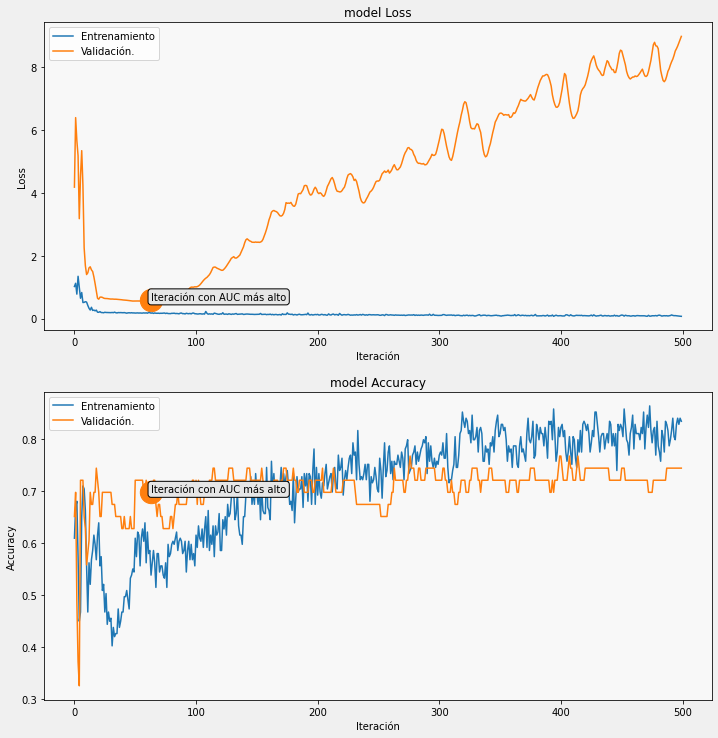

In [124]:
# Desplegando curvas (loss & accuracy)
display_training_curves(history_1.history['loss'], history_1.history['val_loss'], 'Loss', 211)
display_training_curves(history_1.history['accuracy'], history_1.history['val_accuracy'], 'Accuracy', 212)

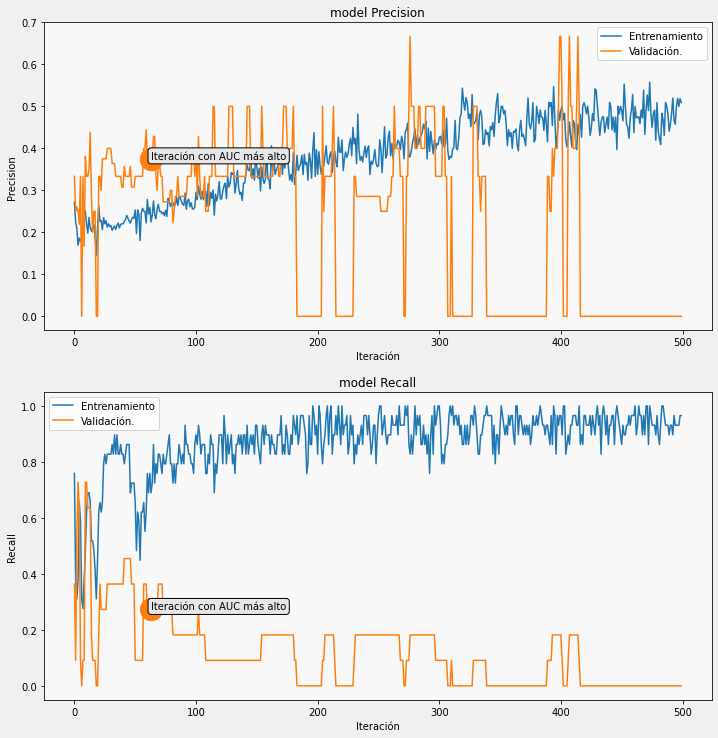

In [125]:
# Desplegando curvas (precision & recall)
display_training_curves(history_1.history['precision'], history_1.history['val_precision'], 'Precision', 211)
display_training_curves(history_1.history['recall'], history_1.history['val_recall'], 'Recall', 212)

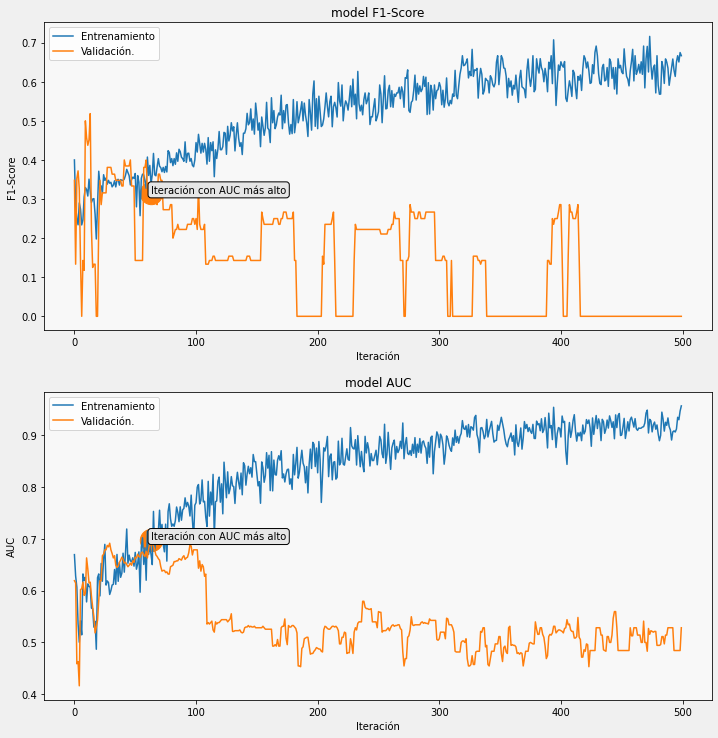

In [126]:
# Desplegando curvas (f1_score & AUC)
display_training_curves(history_1.history['f1_score'], history_1.history['val_f1_score'], 'F1-Score', 211)
display_training_curves(history_1.history['AUC'], history_1.history['val_AUC'], 'AUC', 212)

In [127]:
# Cargamos el modelo con la mejor métrica de F1-Score en validación
rnet.load_weights("rnet_clinic_data.h5")

In [108]:
# Calculando las predicciones para Red Neuronal
Y_train_pred = (rnet.predict(X_train_pca) > 0.5).astype("int32")
Y_train_proba = rnet.predict(X_train_pca) # Arreglo de probabilidades
Y_test_pred = (rnet.predict(X_test_pca) > 0.5).astype("int32")
Y_test_proba = rnet.predict(X_test_pca) # Arreglo de probabilidades

Lamentablemente Tensorflow subestima la métrica F1-Score y Sobrestima la métrica AUC. Para este trabajo se reportarán los resultados con base en la biblioteca de Scikit-Learn y se utilizará las métricas de TensorFlow sólo como auxiliar para hallar el valor más alto ponderado durante las iteracion o entrenamiento.

Por tanto es posible que algunas gráficas del entrenamiento difieran con los resultados finales de estas dos métricas.

A continuación de realiza una demostración de lo anteriromente descrito.




In [129]:
# Desplegando métrica del rendimiento
print("RED NEURONAL TensorFlow Metrics")
print()
print("MÉTRICAS EN ENTRENAMIENTO")
metric = tf.keras.metrics.BinaryAccuracy()
metric.update_state(Y_train, Y_train_pred)
print("Accuracy: %0.2f%%"%(100*metric.result().numpy()))
metric = tf.keras.metrics.Precision()
metric.update_state(Y_train, Y_train_pred)
print("Precision: %0.2f%%"%(100*metric.result().numpy()))
metric = tf.keras.metrics.Recall()
metric.update_state(Y_train, Y_train_pred)
print("Recall: %0.2f%%"%(100*metric.result().numpy()))
metric = tfa.metrics.F1Score(num_classes=2, average="micro", threshold=0.5)
metric.update_state(Y_train, Y_train_pred)
print("F1-Score: %0.2f%%"%(100*metric.result().numpy()))
metric = tf.keras.metrics.AUC()
metric.update_state(Y_train, Y_train_proba)
print("AUC: %0.2f%%"%(100*metric.result().numpy()))
print()
print("MÉTRICAS EN VALIDACIÓN")
metric = tf.keras.metrics.BinaryAccuracy()
metric.update_state(Y_test, Y_test_pred)
print("Accuracy: %0.2f%%"%(100*metric.result().numpy()))
metric = tf.keras.metrics.Precision()
metric.update_state(Y_test, Y_test_pred)
print("Precision: %0.2f%%"%(100*metric.result().numpy()))
metric = tf.keras.metrics.Recall()
metric.update_state(Y_test, Y_test_pred)
print("Recall: %0.2f%%"%(100*metric.result().numpy()))
metric = tfa.metrics.F1Score(num_classes=2, average="micro", threshold=0.5)
metric.update_state(Y_test, Y_test_pred)
print("F1-Score: %0.2f%%"%(100*metric.result().numpy()))
metric = tf.keras.metrics.AUC()
metric.update_state(Y_test, Y_test_proba)
print("AUC: %0.2f%%"%(100*metric.result().numpy()))
print()
print()
print("RED NEURONAL SciKit-Learn Metrics")
print()
print("MÉTRICAS EN ENTRENAMIENTO")
print("Accuracy: %0.2f%%"%(100*accuracy_score(Y_train, Y_train_pred)))
print("Precision: %0.2f%%"%(100*precision_score(Y_train, Y_train_pred)))
print("Recall: %0.2f%%"%(100*recall_score(Y_train, Y_train_pred)))
print("F1-Score: %0.2f%%"%(100*f1_score(Y_train, Y_train_pred)))
fp, tp, _ = roc_curve(Y_train, Y_train_proba)
print("AUC: %0.2f%%"%(100*auc(fp, tp)))
print()
print("MÉTRICAS EN VALIDACIÓN")
print("Accuracy: %0.2f%%"%(100*accuracy_score(Y_test, Y_test_pred)))
print("Precision: %0.2f%%"%(100*precision_score(Y_test, Y_test_pred)))
print("Recall: %0.2f%%"%(100*recall_score(Y_test, Y_test_pred)))
print("F1-Score: %0.2f%%"%(100*f1_score(Y_test, Y_test_pred)))
fp, tp, _ = roc_curve(Y_test, Y_test_proba)
print("AUC: %0.2f%%"%(100*auc(fp, tp)))
print()

RED NEURONAL TensorFlow Metrics

MÉTRICAS EN ENTRENAMIENTO
Accuracy: 57.99%
Precision: 23.08%
Recall: 62.07%
F1-Score: 25.02%
AUC: 62.50%

MÉTRICAS EN VALIDACIÓN
Accuracy: 60.47%
Precision: 37.50%
Recall: 81.82%
F1-Score: 35.08%
AUC: 73.72%


RED NEURONAL SciKit-Learn Metrics

MÉTRICAS EN ENTRENAMIENTO
Accuracy: 57.99%
Precision: 23.08%
Recall: 62.07%
F1-Score: 33.64%
AUC: 63.39%

MÉTRICAS EN VALIDACIÓN
Accuracy: 60.47%
Precision: 37.50%
Recall: 81.82%
F1-Score: 51.43%
AUC: 70.03%



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys


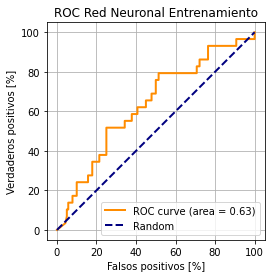

In [130]:
# Curva ROC de entrenamiento
plot_roc('ROC Red Neuronal Entrenamiento', Y_train, Y_train_proba, name_fig='RNET')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys


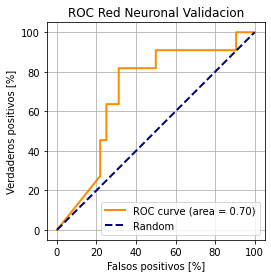

In [131]:
# Curva de Roc de Validación
plot_roc('ROC Red Neuronal Validacion', Y_test, Y_test_proba, name_fig='RNET')

# Conclusión

Se realizaron varios experimentos en esta libreta para intentar mejorar la métrica F1-Score pero fueron infructuosos.

Sin embargo la métrica AUC demostró en diversas ocasiones tener un resultado mejor que el azar. Por tanto se almacenó el modelo con el mejor AUC (Área bajo la curva ROC) para pruebas posteriores.

In [132]:
rnet.save('PCA_rnet_clinic_data.h5')